## Netflix Data: Cleaning, Analysis and Visualization

By Ruth Olusanya, Jan 10 2023

This file was obtained from Kaggle and the purpose of this analysis is to understand the content strategy and changes the streaming platform Netflix has done between 2008-2021.

## 1.0 Discussing the dataset
There is a single dataset that is being used, the netflix1.csv. This file was obtained from [Kaggle](https://www.kaggle.com/datasets/ariyoomotade/netflix-data-cleaning-analysis-and-visualization) and it is an already cleaned version of another file.

This data set consist on contents added to Netflix from 2008 to 2021. The variables of this data set are:
- *show_id*: Netflix ID of the media.
- *Type*: Movie or TV Show.
- *title*: Title of the media.
- *director*: Director of the media.
- *country*: Country in which the movie was made.
- *date_added*: Date in which the media was added.
- *release_year*: Year in which the media was released.
- *rating*: Age rating of the media.
- *duration*: Duration of the media.
- *listen_in*: Classification given by Netflix.

## 2.0 Importing Libraries

In [1]:
# Importing Libraries
import pandas as pd
# data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## 3.0 Gathering
In this section of the report, we will gather the dataset and turn it into a DataFrame.

In [2]:
# Importing the data from a csv file to a DataFrame
df = pd.read_csv("C:/Users/USER/Desktop/Data Cleaning/netflix1.csv/netflix1.csv")
# Showing the first five values of the DataFrame
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


## 4.0 Assessing
This section of the report we will assess any issues the data may have.

In [3]:
# Let's check the status of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [8]:
# Checking for null values in dataset
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

show_id - 0.0%
type - 0.0%
title - 0.0%
director - 0.0%
country - 0.0%
date_added - 0.0%
release_year - 0.0%
rating - 0.0%
duration - 0.0%
listed_in - 0.0%


In [4]:
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [9]:
# Clean show_id Column
df['show_id'] = df['show_id'].str.replace('s', '').astype(int)

In [5]:
# Checking if there are any duplicates
df.duplicated().value_counts()

False    8790
dtype: int64

In [10]:
# Clean date_added Column
df['year_added'] = df['date_added'].str.extract(pat = '([0-9]{4})').astype(int)

In [6]:
df.groupby('duration').count().sort_values(by='show_id',ascending=False)

,show_id,type,title,director,country,date_added,release_year,rating,listed_in
duration,,,,,,,,,
1 Season,1791,1791,1791,1791,1791,1791,1791,1791,1791
2 Seasons,421,421,421,421,421,421,421,421,421
3 Seasons,198,198,198,198,198,198,198,198,198
90 min,152,152,152,152,152,152,152,152,152
94 min,146,146,146,146,146,146,146,146,146
...,...,...,...,...,...,...,...,...,...
201 min,1,1,1,1,1,1,1,1,1
200 min,1,1,1,1,1,1,1,1,1
196 min,1,1,1,1,1,1,1,1,1


In [7]:
# Let's perform a basic visual analysis of the data.
# pd.set_option('display.max_rows', 220)
df.groupby('duration').count().sort_values(by='show_id',ascending=False)

,show_id,type,title,director,country,date_added,release_year,rating,listed_in
duration,,,,,,,,,
1 Season,1791,1791,1791,1791,1791,1791,1791,1791,1791
2 Seasons,421,421,421,421,421,421,421,421,421
3 Seasons,198,198,198,198,198,198,198,198,198
90 min,152,152,152,152,152,152,152,152,152
94 min,146,146,146,146,146,146,146,146,146
...,...,...,...,...,...,...,...,...,...
201 min,1,1,1,1,1,1,1,1,1
200 min,1,1,1,1,1,1,1,1,1
196 min,1,1,1,1,1,1,1,1,1


### 4.1 Assessment & Categorising

#### 4.1.1 Quality issue
- Variable 'date_added' has the wrong data type.
- Variable 'duration' has the wrong data type.

#### 4.1.2 Tidiness issue
- The 'listed_in' variable has several categories in a single observation.
- There are two types of observations, TV shows and movies.

## 5.0 Cleaning
In this section of the report we will solve the quality and tidiness issues mentioned in the assessment.

In [14]:
# Before cleaning, lets make a copy of the dataframe.
df_clean = df.copy()

### 5.1 'date_added' variable has wrong data type

#### 5.1.1 Define
The variable 'date_added' has been categorised as an object (string), the most appropriate type of data for this variable would be datetime.

#### 5.1.2 Code

In [15]:
df_clean.date_added = pd.to_datetime(df_clean.date_added)

#### 5.1.3 Test

In [16]:

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   int32         
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
 10  year_added    8790 non-null   int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(7)
memory usage: 686.8+ KB


### 5.2 'listed_in' variable has several variables

#### 5.2.1 Define
The 'listed_in' variable can have several categories per media, we would like to create new variables to be able to extract this and correctly filter the data. We will assume that the first category would be the 'main' category of the movie.

#### 5.2.2 Code

In [18]:
df_clean

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added,listed_in1,listed_in2,listed_in3
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,Documentaries,0,0
1,3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,Crime TV Shows,International TV Shows,TV Action & Adventure
2,6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021,TV Dramas,TV Horror,TV Mysteries
3,14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2021,Children & Family Movies,Comedies,0
4,8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,Dramas,Independent Movies,International Movies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",2017,International TV Shows,TV Dramas,0
8786,8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,2018,Kids' TV,0,0
8787,8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",2016,International TV Shows,Romantic TV Shows,TV Dramas
8788,8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV,2018,Kids' TV,0,0


### 5.3 Two different observation on a single dataset

#### 5.3.1 Define
There are two different types of observations in a single data set: TV Shows and Movies. The solution would be to split the dataset into two.

#### 5.3.2 Code

In [19]:
df_tv = df_clean[df_clean.type == 'TV Show']
df_movie = df_clean[df_clean.type == 'Movie']

#### 5.3.3 Test

In [20]:
df_tv.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added,listed_in1,listed_in2,listed_in3
1,3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,Crime TV Shows,International TV Shows,TV Action & Adventure
2,6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021,TV Dramas,TV Horror,TV Mysteries
5,9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",2021,British TV Shows,Reality TV,0
17,4,TV Show,Jailbirds New Orleans,Not Given,Pakistan,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",2021,Docuseries,Reality TV,0
18,15,TV Show,Crime Stories: India Detectives,Not Given,Pakistan,2021-09-22,2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",2021,British TV Shows,Crime TV Shows,Docuseries


In [21]:
df_movie.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added,listed_in1,listed_in2,listed_in3
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,Documentaries,0,0
3,14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2021,Children & Family Movies,Comedies,0
4,8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,Dramas,Independent Movies,International Movies
6,10,Movie,The Starling,Theodore Melfi,United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",2021,Comedies,Dramas,0
7,939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,2021-05-01,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu...",2021,Children & Family Movies,Comedies,Music & Musicals


### 5.4 Variable 'duration' has the wrong data type

#### 5.4.1 Define
Whilst movies and TV shows were combined into a single dataframe, it was not possible to easily compare the length of these medias. However, now that they are separated each of these variables are not require to be kept as an object; but instead they should be integers.

#### 5.4.2 Test

In [22]:
df_tv.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added,listed_in1,listed_in2,listed_in3
1,3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,Crime TV Shows,International TV Shows,TV Action & Adventure
2,6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021,TV Dramas,TV Horror,TV Mysteries
5,9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",2021,British TV Shows,Reality TV,0
17,4,TV Show,Jailbirds New Orleans,Not Given,Pakistan,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",2021,Docuseries,Reality TV,0
18,15,TV Show,Crime Stories: India Detectives,Not Given,Pakistan,2021-09-22,2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",2021,British TV Shows,Crime TV Shows,Docuseries


In [23]:
df_movie.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added,listed_in1,listed_in2,listed_in3
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,Documentaries,0,0
3,14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2021,Children & Family Movies,Comedies,0
4,8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,Dramas,Independent Movies,International Movies
6,10,Movie,The Starling,Theodore Melfi,United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",2021,Comedies,Dramas,0
7,939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,2021-05-01,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu...",2021,Children & Family Movies,Comedies,Music & Musicals


## 6.0 Storing
In this step we will store the dataframes into CSV files.

In [24]:
df_clean.to_csv('Netflix_DF_cleaned.csv')
df_tv.to_csv('Netflix_TV_cleaned.csv')
df_movie.to_csv('Netflix_Movie_cleaned.csv')

## 7.0 Analysing and Visualisation of Data
In this section of the report we will explore the answers for the following questions:
- What type of media has Netflix produced the most?
- Which country produced the most of Netflix's media?
- What are the most popular genres for countries that produced media?
- What is the relationship between the year a media was made and when added to the Netflix platform?
- Has Netflix's media classification changed over time?
- What are the most popular genres for Netflix media?
- Has the length of TV seasons or Movie's length changed over time?

### 7.1 General

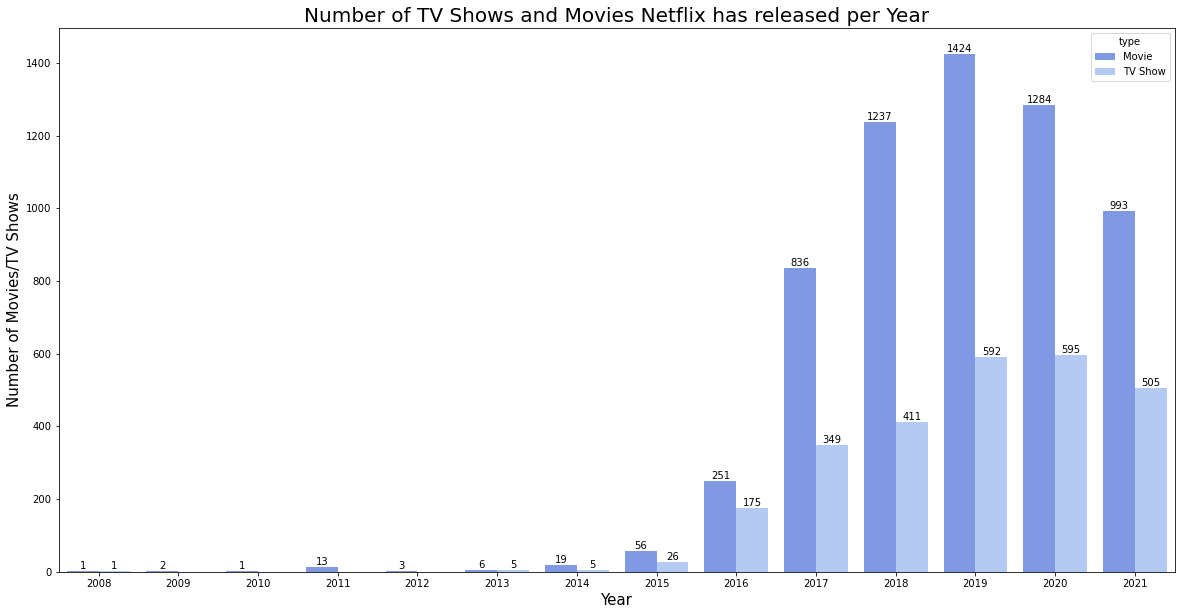

In [25]:
# Considering there are too many countries, we will limit our study to just the top 10 countries.
plt.figure(figsize=[20,10])
base_color = sns.color_palette('coolwarm',n_colors=5)
tv_movie = sns.countplot(x=df_clean.date_added.dt.year, data=df_clean, hue='type', palette = base_color)
tv_movie.set_title("Number of TV Shows and Movies Netflix has released per Year",fontsize = 20)
tv_movie.set_xlabel('Year',fontsize = 15)
tv_movie.set_ylabel('Number of Movies/TV Shows',fontsize = 15)
for container in tv_movie.containers:
    tv_movie.bar_label(container)

Text(0.5, 1.0, 'Pie Chart of the Type of Netflix Content')

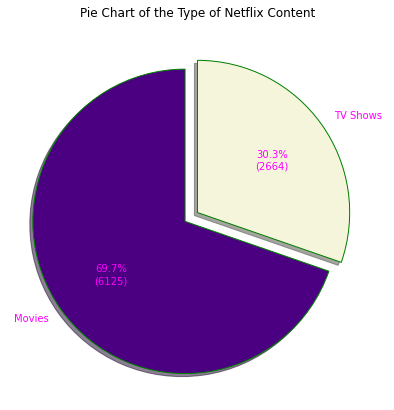

In [39]:
# Pie Chart Of The Type Of Shows On Netflix
data = df['type'].value_counts()
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
colors = ( "indigo", "beige")

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

fig, ax = plt.subplots(figsize = (10,7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  labels=['Movies','TV Shows'],
                                  shadow = True,
                                  explode=(0.1,0),
                                  wedgeprops=wp,
                                  startangle = 90,
                                  colors = colors,
                                  textprops = dict(color="magenta"))

ax.set_title('Pie Chart of the Type of Netflix Content')

#### 7.1.1 Comments on the Number of Netflix's media released per year.

It seems like for both TV shows and Movies there has been a steady increase since the start of 2008; the only big drop happening in 2021 possibly due to the economic impact of COVID.

Before 2017, the number of TV Shows and Movies brought to the streaming service was on par. However, after 2017 the company started introducing more movies into the service more than doubling TV Shows in the amount of content.

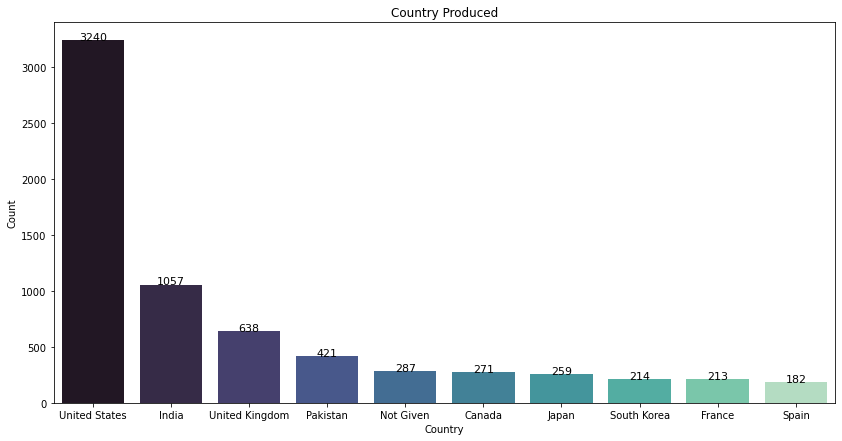

In [41]:
# Countplot Of Country With The Most Produced Content On Netflix
countplt, ax = plt.subplots(figsize = (14,7))
ax = sns.countplot(x=df['country'],
                   order = df['country'].value_counts().head(10).index, 
                   palette='mako')

ax.set_title('Country Produced')
ax.set_xlabel('Country')
ax.set_ylabel('Count')

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()/2,
             rect.get_height()+ 0.75,
             rect.get_height(),
             horizontalalignment='center',
             fontsize = 11)

### 7.2 TV Shows

In [26]:
df_clean.date_added.dt.year.count()

8790

In [27]:
#Let's check how many countries have produced a TV Show for Netlix
len(df_tv.groupby('country').count().index)

59

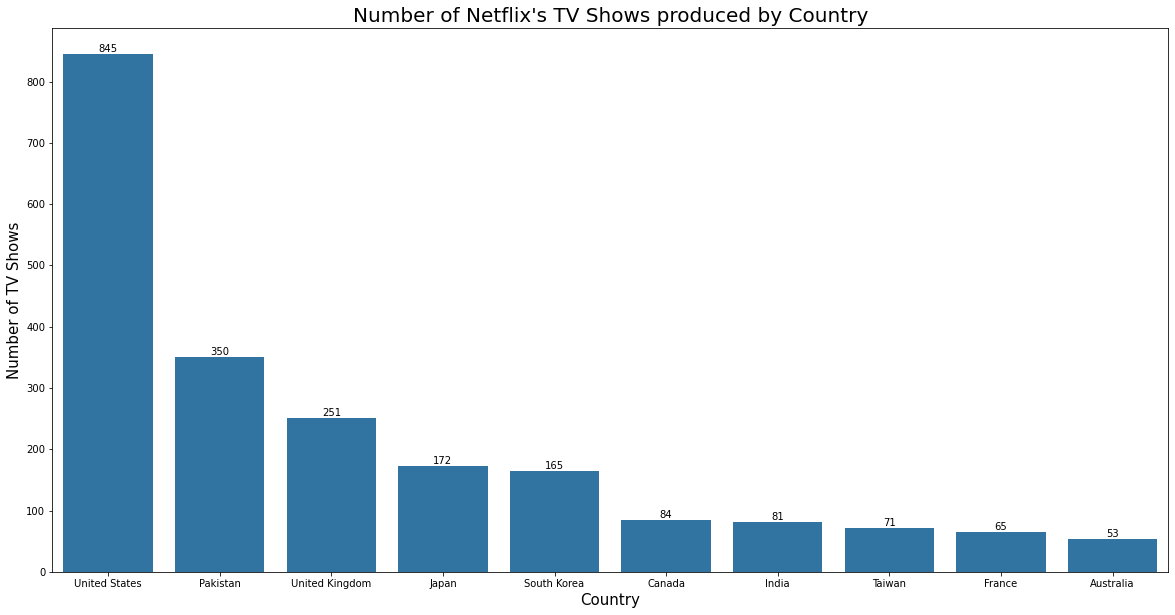

In [28]:
# Considering there are too many countries, we will limit our study to just the top 10 countries.
sort_order = df_tv.groupby('country').count().sort_values(by = 'show_id',ascending=False)[0:10].index
df_tv_c = df_tv[df_tv['country'].isin(sort_order)]
base_color = base_color = sns.color_palette()[0]
plt.figure(figsize=[20,10])
tv_c = sns.countplot(x='country',data=df_tv_c,order=sort_order, color = base_color)
tv_c.set_title("Number of Netflix's TV Shows produced by Country",fontsize = 20)
tv_c.set_xlabel('Country',fontsize = 15)
tv_c.set_ylabel('Number of TV Shows',fontsize = 15)
for container in tv_c.containers:
    tv_c.bar_label(container)

#### 7.2.1 Comments on the number of Netflix's TV Shows produced by Country.
It is not unexpected that most of the TV shows that are brought to the streaming service were produced in the USA. However, the country with the second most production would be Pakistan - which one would normally expect the second place to belong to another english speaking country or  western.

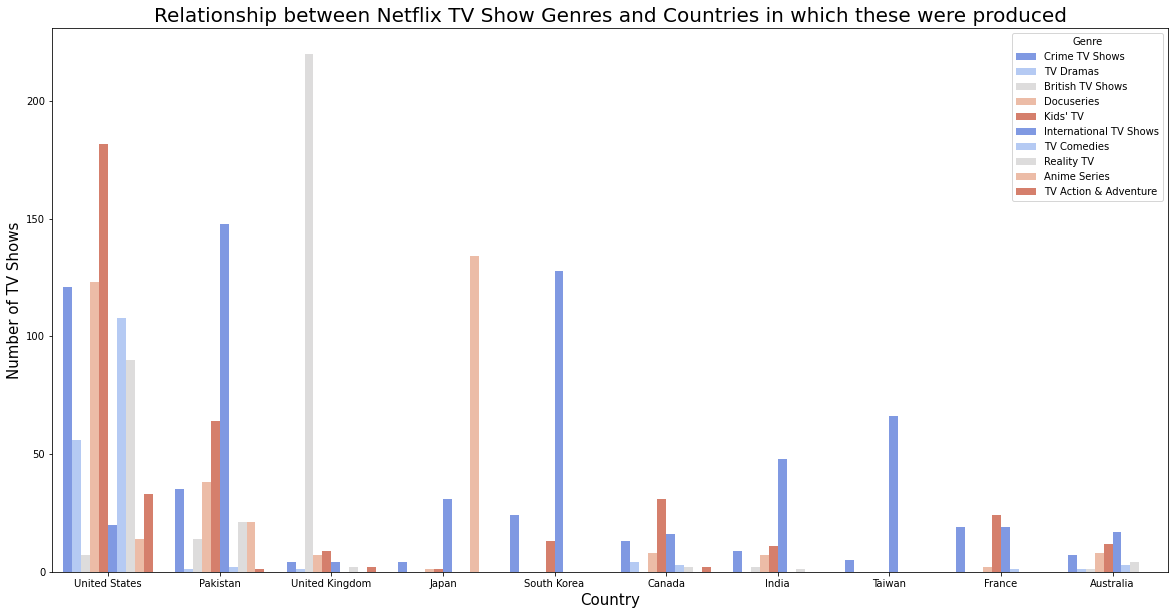

In [29]:
plt.figure(figsize=[20,10])
order1 = df_tv.groupby('listed_in1').count().sort_values(by = 'show_id',ascending=False)[0:10].index
df_tv_f = df_tv[df_tv['listed_in1'].isin(order1)]
order2 = df_tv_f.groupby('country').count().sort_values(by = 'show_id',ascending=False)[0:10].index
df_tv_f = df_tv_f[df_tv_f['country'].isin(order2)]
base_color = sns.color_palette('coolwarm',n_colors=5)
a=df_tv.date_added.dt.year
tv_g = sns.countplot(data=df_tv_f,x='country',hue='listed_in1', palette=base_color, order=order2)
tv_g.set_xlabel('Country',fontsize = 15)
tv_g.set_ylabel('Number of TV Shows',fontsize = 15)
tv_g.set_title("Relationship between Netflix TV Show Genres and Countries in which these were produced",fontsize = 20)
plt.legend(title = 'Genre', loc = 'upper right')

#### 7.2.2 Comments on the relationship vetween the top 10 TV Show Genres on Netflix and countries in which these were produced

The most popular TV genres overall seem to be Kid’s TV and International TV Shows. Considering that Netflix is an American company, it makes sense that shows produced outside of the US are considered ‘International TV Shows.

US has a big diversity of shows produced but most of them were TV Action & Adventure, followed by Docuseries and Crime TV Shows.

For Pakistan and South Korea, both the most produced genres were Kid’s TV and International TV Shows.

However, the UK and Japan have the biggest production of Reality TV shows and Anime series respectively.

#### 7.2.3 Comments on the relationship between TV shows release year and year added to Netflix
Initially, Netflix would not bring recently produced TV shows into the service. It was up until 2016, in which the service started producing their own TV shows and bringing recently filmed TV shows into their streaming service.

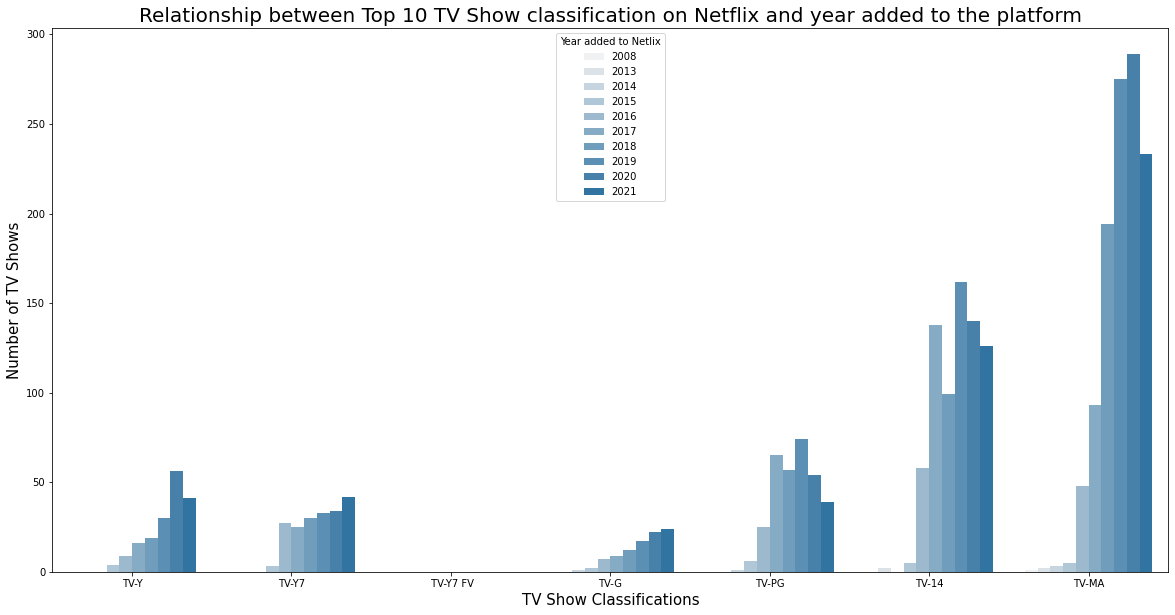

In [31]:
plt.figure(figsize=[20,10])
order = ['TV-Y', 'TV-Y7', ' TV-Y7 FV', 'TV-G', 'TV-PG', 'TV-14', 'TV-MA']
base_color = base_color = sns.color_palette()[0]
a=df_tv.date_added.dt.year
tv_g = sns.countplot(data=df_tv,x='rating',hue=a, order=order, color=base_color)
tv_g.set_xlabel('TV Show Classifications',fontsize = 15)
tv_g.set_ylabel('Number of TV Shows',fontsize = 15)
tv_g.set_title("Relationship between Top 10 TV Show classification on Netflix and year added to the platform",fontsize = 20)
plt.legend(title = 'Year added to Netlix',)

#### 7.2.4 Comments on the Relationship between Netflix TV Shows classification and year added to the platform.
Most of Netflix's TV shows are categorised as TV-MA (primarily) and TV-14 (secondarily). TV-MA had been steadily increasing up until 2021; whilst in the other hand TV-14 has had a sporadic growth with a decrease starting from 2020 - This possible due to TV Shows pushing their classification to a more mature audience (TV-MA).

The only shows that had a steady increase with no drops whatsoever were the ones classified as TV-G and TV-Y7.

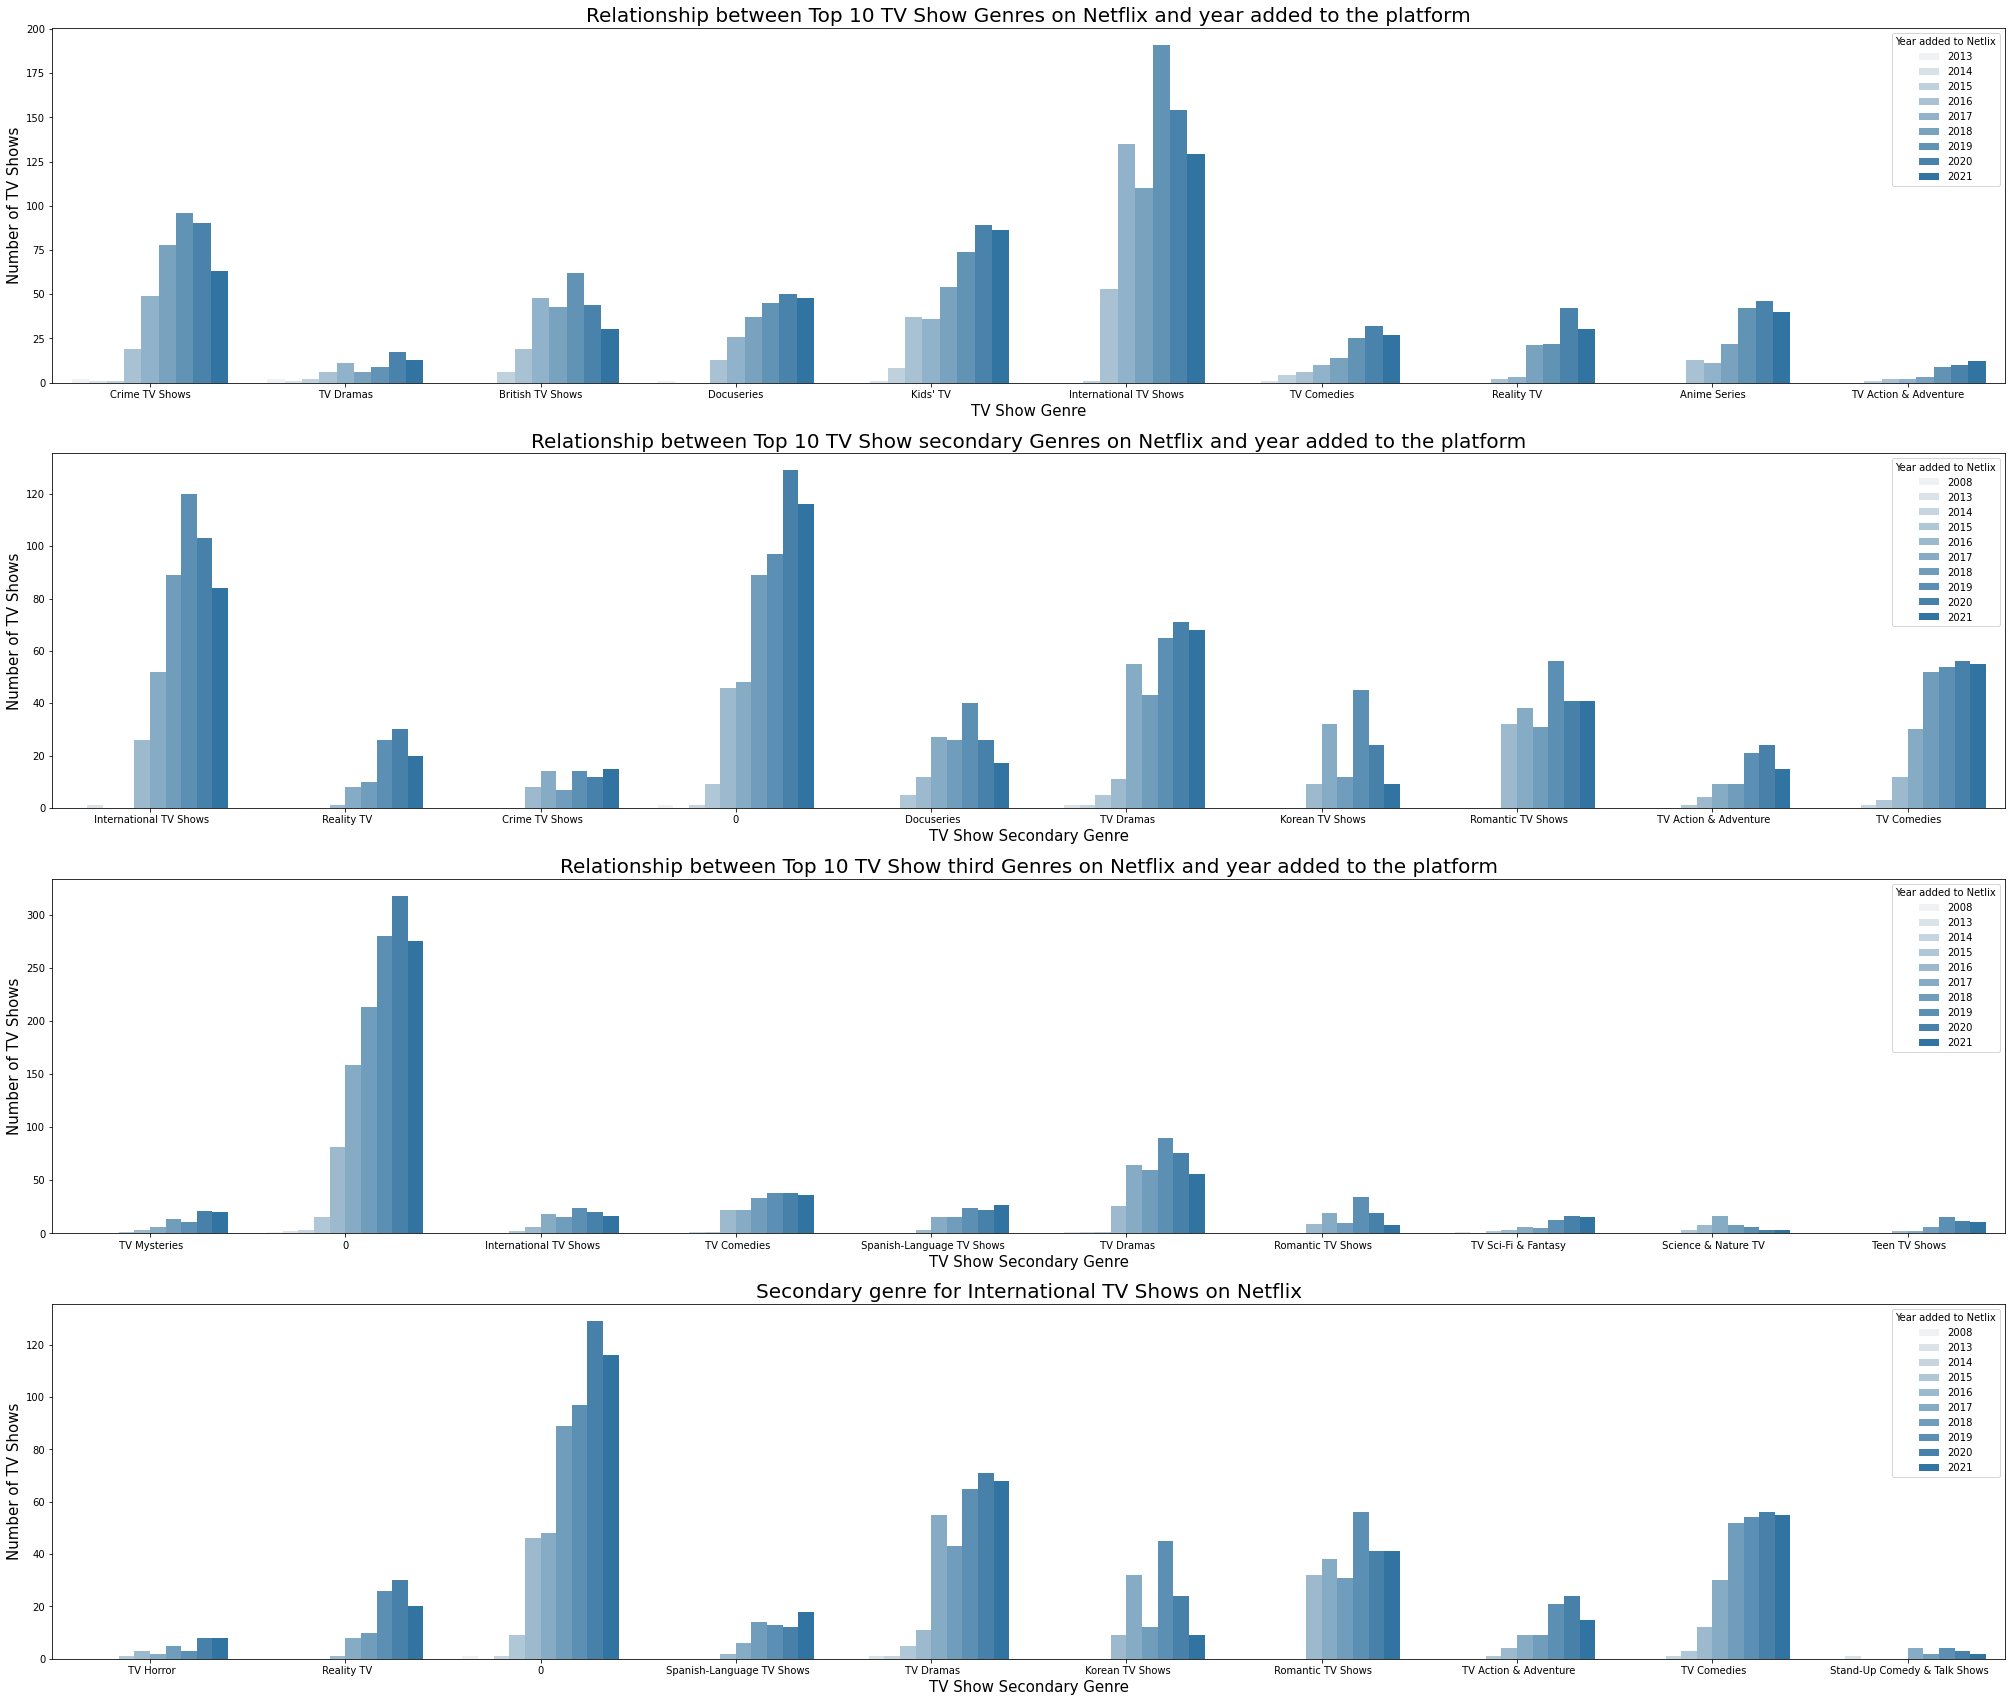

In [32]:
plt.figure(figsize=[35,30])
plt.subplot(4,1,1)

base_color = base_color = sns.color_palette()[0]
sort_order = df_tv.groupby('listed_in1').count().sort_values(by = 'show_id',ascending=False)[0:10].index
df_tv_g = df_tv[df_tv['listed_in1'].isin(sort_order)]
tv_g = sns.countplot(data=df_tv_g,x='listed_in1',hue=df_tv_g.date_added.dt.year, color=base_color)
tv_g.set_xlabel('TV Show Genre',fontsize = 15)
tv_g.set_ylabel('Number of TV Shows',fontsize = 15)
tv_g.set_title("Relationship between Top 10 TV Show Genres on Netflix and year added to the platform",fontsize = 20)
plt.legend(title = 'Year added to Netlix')


plt.subplot(4,1,2)

base_color = base_color = sns.color_palette()[0]
sort_order = df_tv.groupby('listed_in2').count().sort_values(by = 'show_id',ascending=False)[0:10].index
df_tv_g = df_tv[df_tv['listed_in2'].isin(sort_order)]
tv_g1 = sns.countplot(data=df_tv_g,x='listed_in2',hue=df_tv_g.date_added.dt.year, color=base_color)
tv_g1.set_xlabel('TV Show Secondary Genre',fontsize = 15)
tv_g1.set_ylabel('Number of TV Shows',fontsize = 15)
tv_g1.set_title("Relationship between Top 10 TV Show secondary Genres on Netflix and year added to the platform",fontsize = 20)
plt.legend(title = 'Year added to Netlix')

plt.subplot(4,1,3)

base_color = base_color = sns.color_palette()[0]
sort_order = df_tv.groupby('listed_in3').count().sort_values(by = 'show_id',ascending=False)[0:10].index
df_tv_g = df_tv[df_tv['listed_in3'].isin(sort_order)]
tv_g3 = sns.countplot(data=df_tv_g,x='listed_in3',hue=df_tv_g.date_added.dt.year, color=base_color)
tv_g3.set_xlabel('TV Show Secondary Genre',fontsize = 15)
tv_g3.set_ylabel('Number of TV Shows',fontsize = 15)
tv_g3.set_title("Relationship between Top 10 TV Show third Genres on Netflix and year added to the platform",fontsize = 20)
plt.legend(title = 'Year added to Netlix', loc='upper right')

plt.subplot(4,1,4)
df_tv_g1 = df_tv.listed_in1=='International TV Shows'
df_tv_g1 = df_tv[df_tv_g1]
base_color = base_color = sns.color_palette()[0]
sort_order = df_tv_g1.groupby('listed_in2').count().sort_values(by = 'show_id',ascending=False)[0:10].index
df_tv_g1 = df_tv[df_tv['listed_in2'].isin(sort_order)]
tv_g4 = sns.countplot(data=df_tv_g1,x='listed_in2',hue=df_tv_g1.date_added.dt.year, color=base_color)
tv_g4.set_xlabel('TV Show Secondary Genre',fontsize = 15)
tv_g4.set_ylabel('Number of TV Shows',fontsize = 15)
tv_g4.set_title("Secondary genre for International TV Shows on Netflix",fontsize = 20)
plt.legend(title = 'Year added to Netlix', loc='upper right')

#### 7.2.5 Comments on the relationship between Netflix's TV Shows genres and the year added to the platform.
For this analysis an assumption had to be made, the first category that appears on a TV show would be classified as the 'main' category, followed by the secondary and the third.      

Most of the TV shows produced were International TV Shows followed by Crime shows and Kids TV.

For secondary genres, most of TV shows do not have a secondary genre . But the rest were mainly classified as International TV Shows, TV dramas and TV comedies.

For third genres, Most of TV shows do not have a third genre. But the rest were mainly classified as TV Dramas, TV comedies and Romantic TV shows.

Since International TV Shows is a broad genre, we also performed an analysis on the secondary genres for International TV Shows. The result was that most of them do not have a secondary genre. But the rest were mainly classified as TV Dramas, Romantic TV shows and TV comedies.

#### 7.2.6 Comments on the relationship between TV Shows length and the release year / year added to the platform
For both release year and year added to the platform, it seems to be that most of the TV shows just last for a single season.

### 7.3 Movies

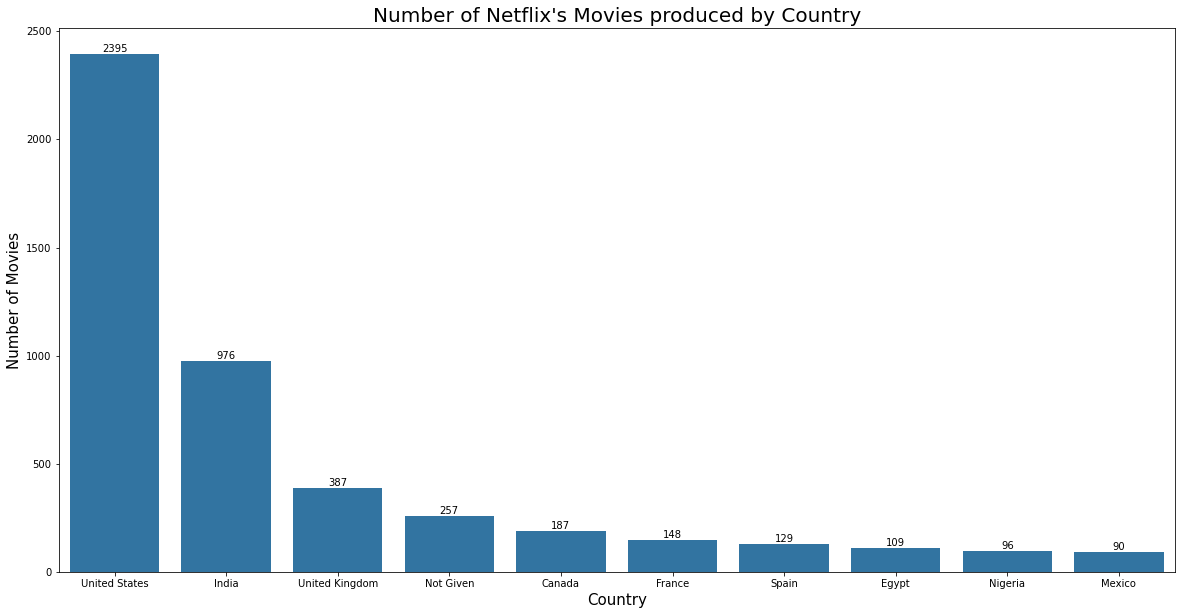

In [34]:
# Considering there are too many countries, we will limit our study to just the top 10 countries.
sort_order = df_movie.groupby('country').count().sort_values(by = 'show_id',ascending=False)[0:10].index
df_movie_c = df_movie[df_movie['country'].isin(sort_order)]
base_color = base_color = sns.color_palette()[0]
plt.figure(figsize=[20,10])
movie_c = sns.countplot(x='country',data=df_movie_c,order=sort_order, color = base_color)
movie_c.set_title("Number of Netflix's Movies produced by Country",fontsize = 20)
movie_c.set_xlabel('Country',fontsize = 15)
movie_c.set_ylabel('Number of Movies',fontsize = 15)
for container in movie_c.containers:
    movie_c.bar_label(container)

#### 7.3.1 Comments on Netflix's Movies produced by country
Similarly to Netflix TV shows, most of the movies were also produced in the United States. However the second most popular country would be India, which it would be likely due to its big movie industry ('Bollywood').

Surprisingly, despite Pakistan producing most of the TV shows for Netflix; it is not considered between the top 10 countries that has produced most movies for Netflix.

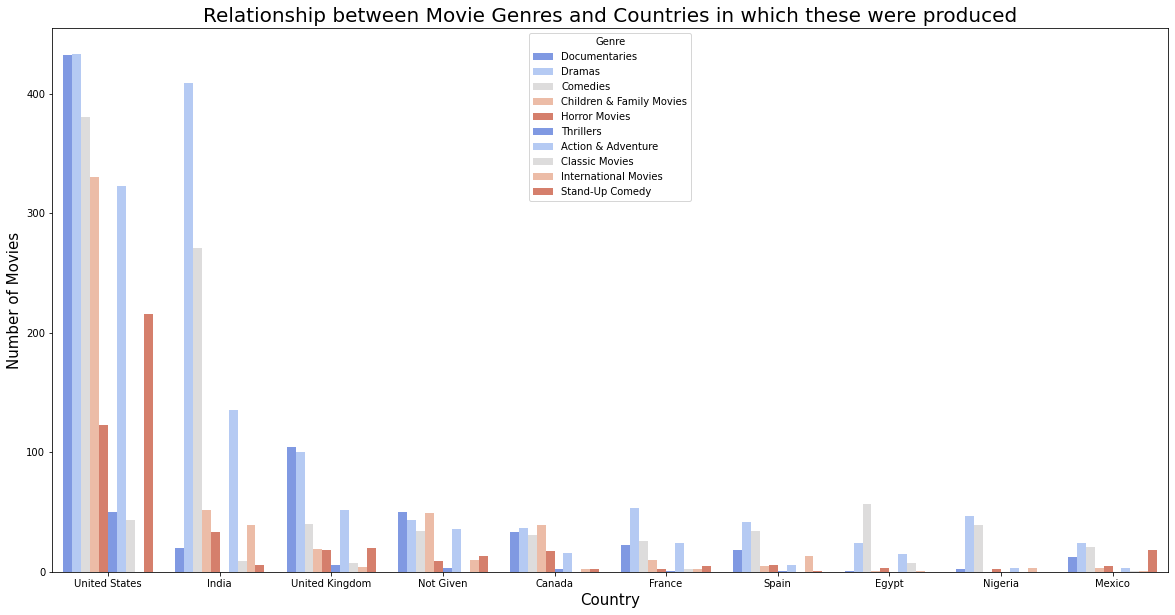

In [35]:
plt.figure(figsize=[20,10])
order1 = df_movie.groupby('listed_in1').count().sort_values(by = 'show_id',ascending=False)[0:10].index
df_movie_f = df_movie[df_movie['listed_in1'].isin(order1)]
order2 = df_movie_f.groupby('country').count().sort_values(by = 'show_id',ascending=False)[0:10].index
df_movie_f = df_movie_f[df_movie_f['country'].isin(order2)]
base_color = sns.color_palette('coolwarm',n_colors=5)
a=df_movie.date_added.dt.year
tv_g = sns.countplot(data=df_movie_f,x='country',hue='listed_in1', palette=base_color, order=order2)
tv_g.set_xlabel('Country',fontsize = 15)
tv_g.set_ylabel('Number of Movies',fontsize = 15)
tv_g.set_title("Relationship between Movie Genres and Countries in which these were produced",fontsize = 20)
plt.legend(title = 'Genre',)

#### 7.3.2 Comments on Netflix's Movies produced by country
Most of the media produced in the US were documentaries, dramas and comedies. Whilst for India, it was mainly dramas followed by comedies.

US and the UK have one of the biggest ratio in movies produced against documentaries.

Furthermore, it seems that Stand-Up Comedy is also a big genre in the US; when compared to other countries.

#### 7.3.3 Comments on the relationship between movies release year and year added to the platform
Starting from 2015, there seems to be a clear increase in the number of movies released in the same year as they were added to the platform. There is also a slight decrease in 2021 but this would have been likely due to COVID - since not many movies were made in 2020 and released in 2021.

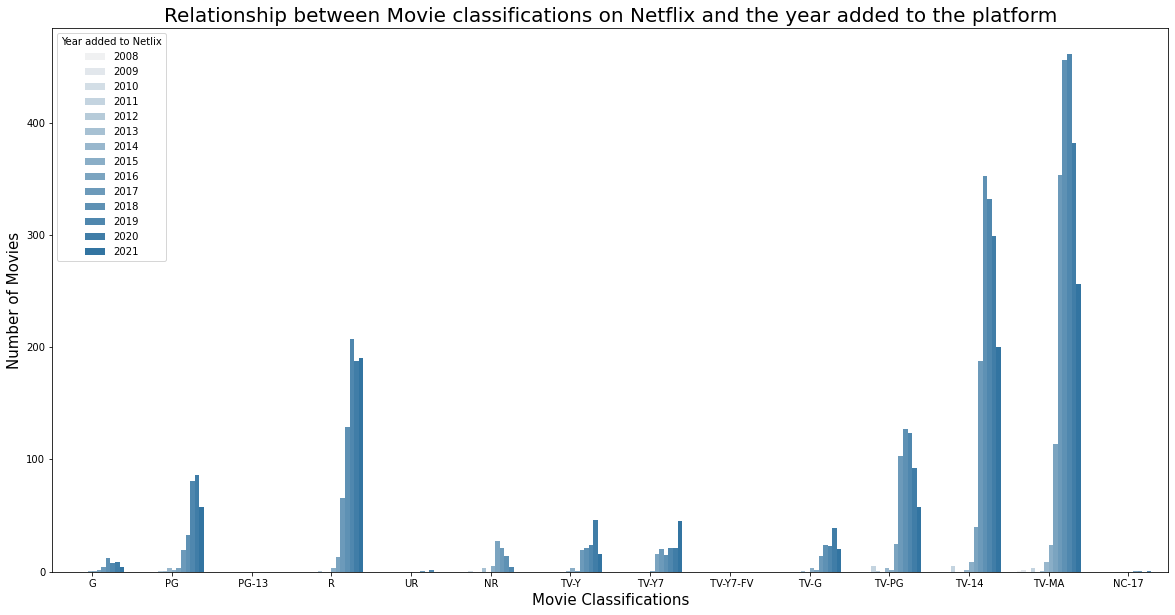

In [36]:
plt.figure(figsize=[20,10])
order = ['G', 'PG', ' PG-13', 'R', 'UR', 'NR', 'TV-Y', 'TV-Y7', ' TV-Y7-FV', 'TV-G', 'TV-PG', 'TV-14', 'TV-MA', 'NC-17']
base_color = base_color = sns.color_palette()[0]
a=df_movie.date_added.dt.year
movie_g = sns.countplot(data=df_movie,x='rating',hue=a,order=order, color=base_color)
movie_g.set_xlabel('Movie Classifications',fontsize = 15)
movie_g.set_ylabel('Number of Movies',fontsize = 15)
movie_g.set_title("Relationship between Movie classifications on Netflix and the year added to the platform",fontsize = 20)
plt.legend(title = 'Year added to Netlix',)


#### 7.3.4 Comments on the movie classifications and the year these were added to the platform.

Movies had both movie classification and TV classification meaning that some of the movies that are part of Netflix were movies made for straight to TV.

There seems to be that most of the movies available on Netflix would be for mature aged people (18+, R and TV-MA). 

It seems that Netflix did not want to bring teen movies released in theatres (PG-13) to its platform but instead bring R-rated movies. This strategy is different to the straight to TV movies, since the second most popular classification would be TV-14.

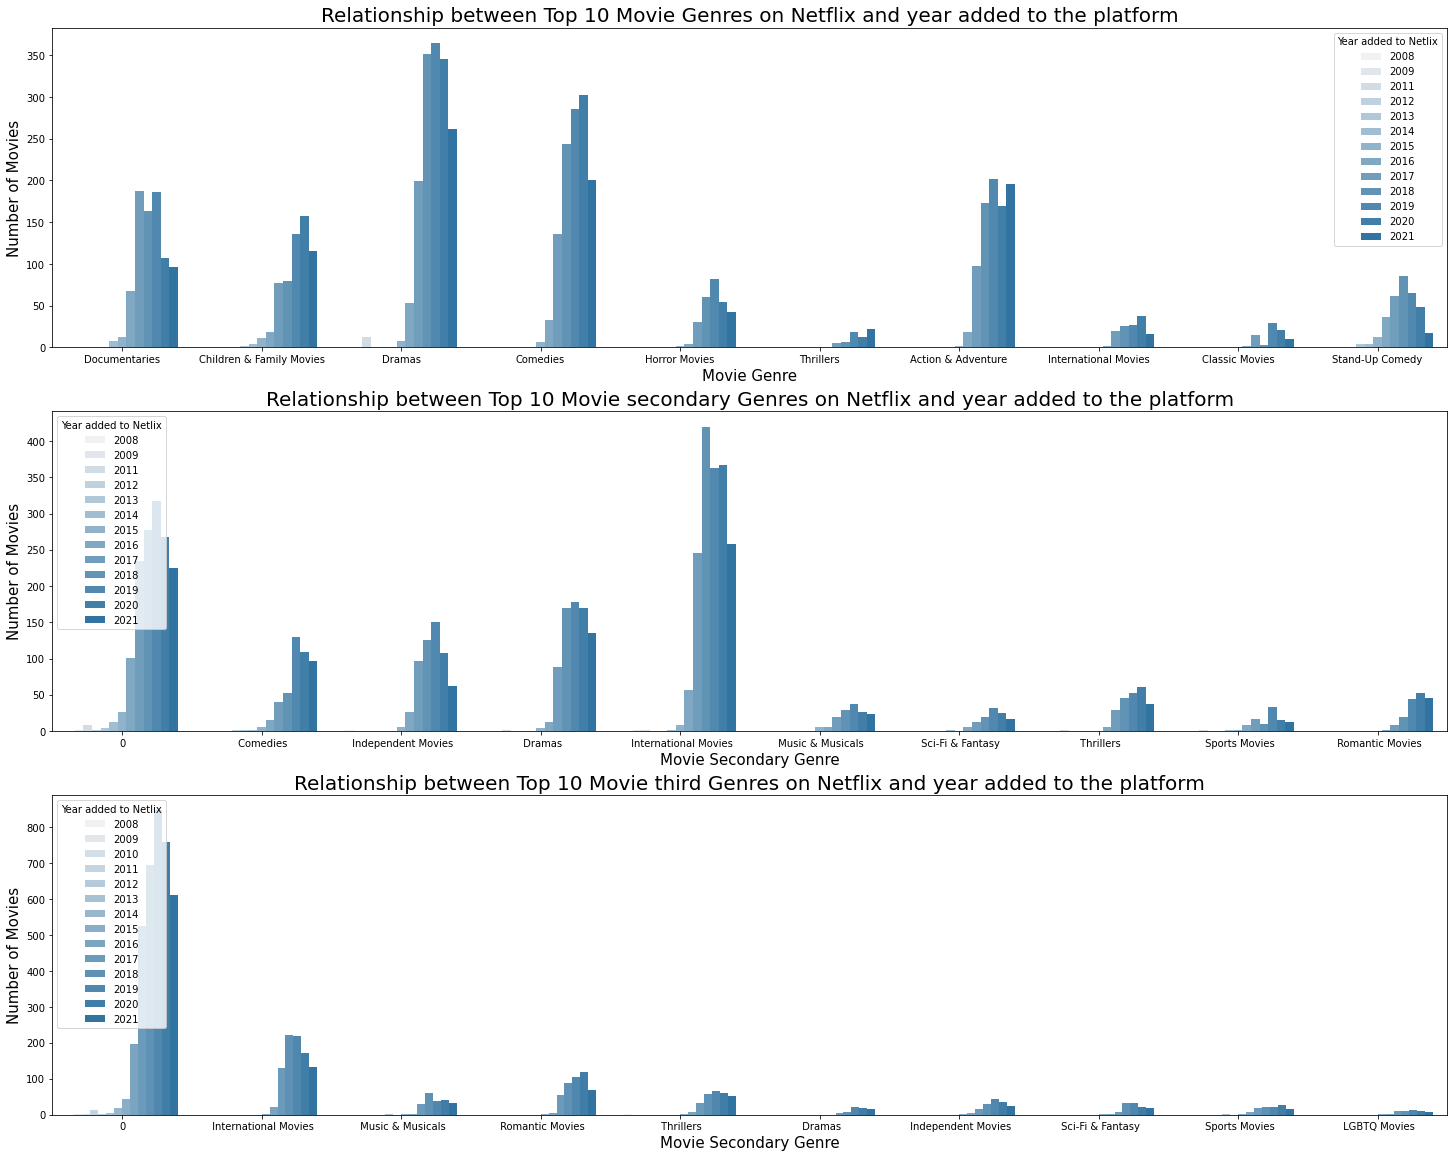

In [37]:
plt.figure(figsize=[25,20])
plt.subplot(3,1,1)

base_color = base_color = sns.color_palette()[0]
sort_order = df_movie.groupby('listed_in1').count().sort_values(by = 'show_id',ascending=False)[0:10].index
df_movie_g = df_movie[df_movie['listed_in1'].isin(sort_order)]
movie_g = sns.countplot(data=df_movie_g,x='listed_in1',hue=df_movie_g.date_added.dt.year, color=base_color)
movie_g.set_xlabel('Movie Genre',fontsize = 15)
movie_g.set_ylabel('Number of Movies',fontsize = 15)
movie_g.set_title("Relationship between Top 10 Movie Genres on Netflix and year added to the platform",fontsize = 20)
plt.legend(title = 'Year added to Netlix')

plt.subplot(3,1,2)

base_color = base_color = sns.color_palette()[0]
sort_order = df_movie.groupby('listed_in2').count().sort_values(by = 'show_id',ascending=False)[0:10].index
df_movie_g = df_movie[df_movie['listed_in2'].isin(sort_order)]
movie_g1 = sns.countplot(data=df_movie_g,x='listed_in2',hue=df_movie_g.date_added.dt.year, color=base_color)
movie_g1.set_xlabel('Movie Secondary Genre',fontsize = 15)
movie_g1.set_ylabel('Number of Movies',fontsize = 15)
movie_g1.set_title("Relationship between Top 10 Movie secondary Genres on Netflix and year added to the platform",fontsize = 20)
plt.legend(title = 'Year added to Netlix')

plt.subplot(3,1,3)

base_color = base_color = sns.color_palette()[0]
sort_order = df_movie.groupby('listed_in3').count().sort_values(by = 'show_id',ascending=False)[0:10].index
df_movie_g = df_movie[df_movie['listed_in3'].isin(sort_order)]
movie_g3 = sns.countplot(data=df_movie_g,x='listed_in3',hue=df_movie_g.date_added.dt.year, color=base_color)
movie_g3.set_xlabel('Movie Secondary Genre',fontsize = 15)
movie_g3.set_ylabel('Number of Movies',fontsize = 15)
movie_g3.set_title("Relationship between Top 10 Movie third Genres on Netflix and year added to the platform",fontsize = 20)
plt.legend(title = 'Year added to Netlix')


#### 7.3.5 Comments on the movie genres and year added to the platform.

For this analysis an assumption had to be made, the first category/genre that appears on a Movie would be classified as the 'main' category, followed by the secondary and the third.      

Most of the movies produced were Dramas, Comedies and Action & Adventure.

For the secondary genres, most of the TV shows are classified as International Movies. But the rest were mainly classified as None, dramas and independent movies.

For the third genre, most TV shows do not have a third genre. But the rest were mainly classified as international movies.

## 8.0 Reporting

The final report can be found as a pdf under the name Netflix_report.pdf

## Conclusion

- Top 5 Ratings
    1. TV-MA (3205)
    2. TV-14 (2155)
    3. TV-RG (8610)
    4. R     (798)
    5. PG-13 (490)
    
    
- Looking at the Top 2 outstanding ratings on the Netflix dataset, TV-MA with 3000+ contents and TV-14 with 2000+ contents. With this, we can see that Netflix's content is highly focused on TV-MA, programs specifically designed to be viewed by adults. And also TV-14, unsuitable for children under 14 years of age. From the data collected, we could assume that Netflix's target audience is teenagers and young adults.


- The type of content on Netflix has two major types, 69.7% of the content on Netflix is movies, and 30.3% in TV Shows.


- From the count plot, we can see that Netflix has the most movies from the United States, with an outstanding count of 3240 contents. Following up is India with 1056, and United Kingdom with 638. This is reasonable because the main target audience was the United States, and the number of content released will begin to level out once Netflix becomes more global, reaching out to more users around the world.


- From the year-added countplot, we can see there is a steady rise in content added in 2014, from the data we can assume there were more and more newly users on the platform around 2016, which explains the high spike in content added in 2017 and onward.
